In [57]:
from sklearn.externals import joblib
import pandas as pd
import numpy as np
import tools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [58]:
filepath = 'test_data/annotated_oob_Snap_-5_5_ios_raw_dj_snap_data.1454698138.248183.txt'
test_df = pd.read_csv(filepath, delimiter=',').drop(['Unnamed: 0', 'ts', 'gyroX', 'gyroY', 'gyroZ', "label", 'corresponding_file'], axis = 1)
test_df = test_df.fillna(method='ffill').dropna()
ls_frames, ls_df = tools.detect_events(100, test_df, 0, 0, 60)

identified event at  133
identified event at  346
identified event at  559
identified event at  773
identified event at  988
identified event at  1182
identified event at  1406
identified event at  1613
identified event at  1854
identified event at  2067
number of events:  10


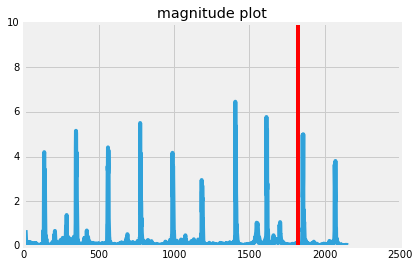

In [59]:
plt.ylim(0, 10)
plt.plot(test_df['magnitude'])
plt.axvline(1826, color='red')
plt.title('magnitude plot')

# 2) event detection

In [60]:
my_event_classifier = joblib.load('models/event_filter/event_filter.pkl') 
tools.apply_gesture_model(ls_df, my_event_classifier)

frame:  0  | prediction:  activity    1
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  1  | prediction:  activity    1
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  2  | prediction:  activity    1
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  3  | prediction:  activity    1
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  4  | prediction:  activity    1
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  5  | prediction:  activity    1
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  6  | prediction:  activity    1
dtype: float64
---------

# 3) gesture classification

In [61]:
my_gesture_classifier = joblib.load('models/gesture_filter/gesture_filter_lr.pkl') 
tools.apply_gesture_model(ls_df, my_gesture_classifier)

frame:  0  | prediction:  Snap     0.818182
Flick    0.181818
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  1  | prediction:  Snap     0.909091
Flick    0.090909
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  2  | prediction:  Snap     0.818182
Flick    0.181818
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  3  | prediction:  Snap     0.636364
Flick    0.363636
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  4  | prediction:  Snap     0.818182
Flick    0.181818
dtype: float64
----------------------------------------------------------------------------------------------------
frame:  5  | prediction:  Snap     0.545455
Flick    0.454545
dtype: float64
---------------------------------

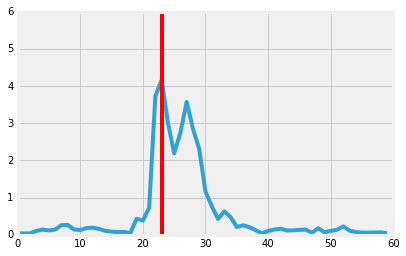

In [62]:
sample_frame = ls_df[4]
peak = np.argmax(sample_frame['magnitude'])

plt.ylim(0, 6)
plt.plot(sample_frame['magnitude'])
plt.axvline(peak, color='red')

In [63]:
pd.Series(my_gesture_classifier.predict(sample_frame.ix[(peak-5):(peak + 5),:])).value_counts(normalize = True)

Snap     0.818182
Flick    0.181818
dtype: float64

In [64]:
pd.Series(my_gesture_classifier.predict(sample_frame.ix[(peak-5):(peak+5),:]))

0      Snap
1     Flick
2     Flick
3      Snap
4      Snap
5      Snap
6      Snap
7      Snap
8      Snap
9      Snap
10     Snap
dtype: object